#Equation

$$\frac{\partial T}{\partial t} = d\cdot \frac{\partial^2 T}{\partial x^2} +S(x, t)$$
$$T(0, t) = \alpha_0(t) \\ T(L, t) = \alpha_L(t) \\ T(x, 0) = \beta(x)$$

In [1]:
import numpy as np

N = 100
w = np.zeros(N)
L = 10
h = L / (N+1)
d = 0.1

$$w' = A \cdot w + b(t)$$

In [2]:
A = np.diag([-2]*N)+np.diag([1]*(N-1),1)+np.diag([1]*(N-1),-1)
A = A*d/h/h
A

array([[-20.402,  10.201,   0.   , ...,   0.   ,   0.   ,   0.   ],
       [ 10.201, -20.402,  10.201, ...,   0.   ,   0.   ,   0.   ],
       [  0.   ,  10.201, -20.402, ...,   0.   ,   0.   ,   0.   ],
       ...,
       [  0.   ,   0.   ,   0.   , ..., -20.402,  10.201,   0.   ],
       [  0.   ,   0.   ,   0.   , ...,  10.201, -20.402,  10.201],
       [  0.   ,   0.   ,   0.   , ...,   0.   ,  10.201, -20.402]])

In [3]:
def S(x, t):
    return np.exp( -(x-L/2)**2 / L/2)
#    return 0

def alpha0( t ):
    return 20 + 100 * np.sin( t / 100 )
    
def alphaL( t ):
    return 40 + 100 * np.cos( t / 100 )

def beta( x ):
    return 300



In [4]:
def b(t):
    ret = [ S((i+1)*h, t) for i in range(N)]
    ret[0] += d*alpha0(t)/h/h
    ret[-1] += d*alphaL(t)/h/h
    return ret



In [8]:

def F(w, t):
    return (np.dot(A,w))+b(t)

dt = 0.02

w0 = np.array([ beta( (i+1)*h ) for i in range(N) ])

steps = 80000
X = np.zeros((steps+1,N))
X[0] = w0
for ts in range(steps):
    X[ts+1] = dt*F(X[ts], ts*dt) + X[ts]


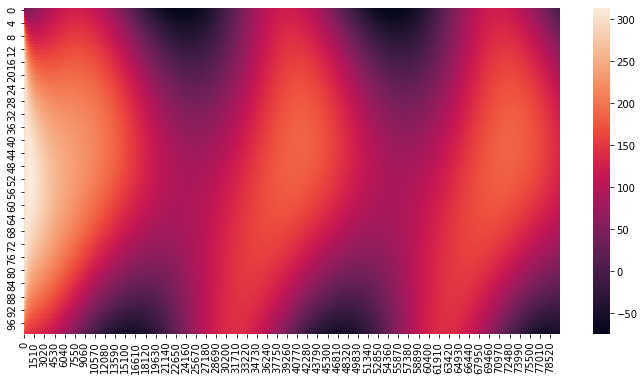

In [10]:
from matplotlib import pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(figsize=(12,6))
sns.heatmap(X.T[::,::], ax=ax)
plt.show()

In [11]:
from sklearn.utils.extmath import randomized_svd


In [47]:
U, s, Vh = randomized_svd(X.T, n_components=4, random_state=0)


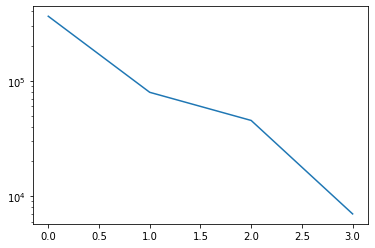

In [48]:
plt.semilogy(s)

In [49]:
U.shape

(100, 4)

In [50]:
Xrec = U@np.diag(s)@Vh

<AxesSubplot:>

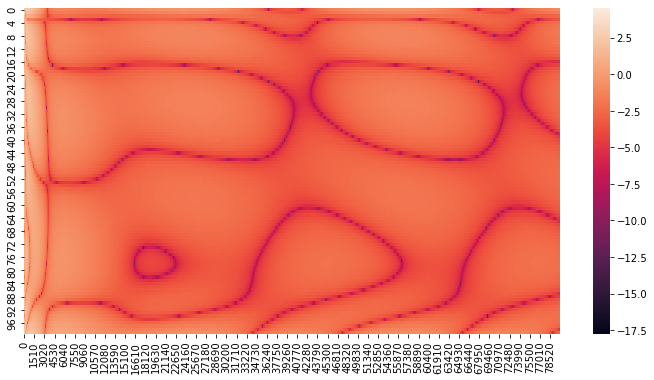

In [51]:
fig, ax = plt.subplots(figsize=(12,6))
sns.heatmap(np.log(np.abs((Xrec - X.T)))[::,::], ax=ax)